In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
import pandas_profiling
warnings.filterwarnings("ignore")

In [16]:
data_frame = pd.read_csv("data.csv")
print(data_frame.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [17]:
data_frame.dropna(axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Make a report
profile = data_frame.profile_report(title = "Report_for_data")
profile.to_file(output_file="Report_for_data.html")

In [20]:
# I won't repeat EDA step
# I will go straight to build the model
# If you care EDA you can find it into Model K_Nearest_Neighbor

from sklearn.model_selection import train_test_split

y = data_frame.diagnosis

data_feature = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean',
'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst',
'concave points_worst','symmetry_worst','fractal_dimension_worst']

x = data_frame[data_feature]

data_model = RandomForestClassifier()

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
# Split data
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size=0.33 , random_state=42)
pred_train = data_model.fit(x_train,y_train)
true_train = data_model.predict(x_train)
print("Confusion Matrix on train data: ", confusion_matrix(true_train , y_train , labels=['M','B']))
print("Accuracy on train data: ", accuracy_score(true_train , y_train))

Confusion Matrix on train data:  [[145   0]
 [  0 236]]
Accuracy on train data:  1.0


In [23]:
true_test = pred_train.predict(x_test)
print("Confusion Matrix on train data: ", confusion_matrix(true_test , y_test , labels=['M','B']))
print("Accuracy on train data: ", accuracy_score(true_test , y_test))

Confusion Matrix on train data:  [[ 63   2]
 [  4 119]]
Accuracy on train data:  0.9680851063829787


In [24]:
# Check Overfitting

train_score , test_score = list(), list()

# Run through dept tree
value = [i for i in range(1,100)]
for i in value:
    # configure models
    model = RandomForestClassifier(max_depth=i , max_features=30)
    # fit model on training data set
    model.fit(x_train,y_train)
    #evaluate on training data set
    train_true_1 = model.predict(x_train)
    train_accuracy = accuracy_score(y_train,train_true_1)
    train_score.append(train_accuracy)

    # evaluate on testing data set

    test_true_1 = model.predict(x_test)
    test_accuracy_1 = accuracy_score(y_test,test_true_1)
    test_score.append(test_accuracy_1)

    # Print summarize process
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy , test_accuracy_1))


>1, train: 0.929, test: 0.888
>2, train: 0.966, test: 0.957
>3, train: 0.987, test: 0.941
>4, train: 0.992, test: 0.941
>5, train: 0.997, test: 0.952
>6, train: 0.997, test: 0.963
>7, train: 1.000, test: 0.952
>8, train: 1.000, test: 0.947
>9, train: 1.000, test: 0.947
>10, train: 1.000, test: 0.952
>11, train: 1.000, test: 0.947
>12, train: 1.000, test: 0.941
>13, train: 1.000, test: 0.941
>14, train: 1.000, test: 0.947
>15, train: 1.000, test: 0.952
>16, train: 1.000, test: 0.957
>17, train: 1.000, test: 0.941
>18, train: 1.000, test: 0.947
>19, train: 1.000, test: 0.947
>20, train: 1.000, test: 0.952
>21, train: 1.000, test: 0.947
>22, train: 1.000, test: 0.941
>23, train: 1.000, test: 0.941
>24, train: 1.000, test: 0.947
>25, train: 1.000, test: 0.947
>26, train: 1.000, test: 0.947
>27, train: 1.000, test: 0.947
>28, train: 1.000, test: 0.941
>29, train: 1.000, test: 0.947
>30, train: 1.000, test: 0.947
>31, train: 1.000, test: 0.936
>32, train: 1.000, test: 0.952
>33, train: 1.000

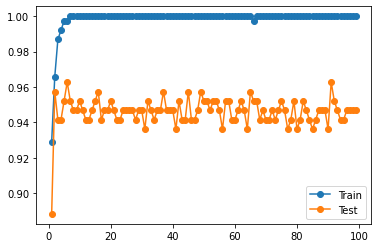

In [25]:
plt.plot(value,train_score, '-o', label = "Train")
plt.plot(value,test_score , '-o', label = 'Test')
plt.legend()
plt.show()